In [1]:
import requests

# Define the NewsAPI endpoint and parameters
url = "https://newsapi.org/v2/everything"
params = {
    "q": "Premier League", # search query
    "language": "en", # language of the articles
    "sortBy": "relevancy", # sort order
    "apiKey": "776f60abee554e79be38d13ae8084ad6" # your NewsAPI API key
}

# Make a request to the NewsAPI endpoint
response = requests.get(url, params=params)

# Extract the article titles and text
articles = response.json()["articles"]
for article in articles:
    title = article["title"]
    text = article["description"]
    
    # Do something with the title and text, such as sentiment analysis


In [2]:
articles

[{'source': {'id': 'bbc-news', 'name': 'BBC News'},
  'author': None,
  'title': 'The moment ex-Premier League footballer crashes car into shop',
  'description': "Newly-obtained video shows Danny Graham's Land Rover smashing into a Co-op doorway.",
  'url': 'https://www.bbc.co.uk/news/av/uk-65316655',
  'urlToImage': 'https://ichef.bbci.co.uk/news/1024/branded_news/A6F4/production/_129404724_p0fhd8ql.jpg',
  'publishedAt': '2023-04-18T17:02:39Z',
  'content': 'Newly-obtained footage shows the moment former Premier League footballer Danny Graham crashes his car into a shop doorway.\r\nThe video comes days after Graham admitted to being almost three times over… [+176 chars]'},
 {'source': {'id': None, 'name': 'The Guardian'},
  'author': 'Daniel Gallan',
  'title': 'West Ham v Arsenal: Premier League – live',
  'description': '<ul><li>Premier League updates from the 2pm BST kick-off</li><li>Moyes’ low-risk plan hints at summer departure</li><li>Live scores | And email Daniel or tweet @d

In [3]:
import re
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

def preprocess_text(text):
    # Convert the text to lowercase
    text = text.lower()
    
    # Remove non-alphanumeric characters and extra whitespaces
    text = re.sub(r"[^a-zA-Z0-9\s]", "", text)
    text = re.sub(r"\s+", " ", text)
    
    # Tokenize the text into individual words
    words = word_tokenize(text)
    
    # Remove stopwords
    words = [word for word in words if word not in stopwords.words("english")]
    
    # Lemmatize the words
    lemmatizer = WordNetLemmatizer()
    words = [lemmatizer.lemmatize(word) for word in words]
    
    # Join the words back into a single string separated by whitespace
    preprocessed_text = " ".join(words)
    
    return preprocessed_text

# Preprocess the article text
preprocessed_articles = []
for article in articles:
    text = article["description"]
    preprocessed_text = preprocess_text(text)
    preprocessed_articles.append(preprocessed_text)


In [4]:
preprocessed_text

'rben neve stoppagetime penalty confirmed wolf third successive home victory likelihood premier league statuswith long lock unfurled gold shirt ripped wolf captain look like man desperate l'

In [5]:
from textblob import TextBlob

# Define a function to perform sentiment analysis using TextBlob
def get_sentiment(text):
    blob = TextBlob(text)
    sentiment = blob.sentiment.polarity
    if sentiment > 0:
        return "positive"
    elif sentiment == 0:
        return "neutral"
    else:
        return "negative"

# Apply the function to each preprocessed article
sentiments = []
for article in preprocessed_articles:
    sentiment = get_sentiment(article)
    sentiments.append(sentiment)

# Print the sentiments of the articles
for i, sentiment in enumerate(sentiments):
    print(f"Article {i+1}: {sentiment}")


Article 1: neutral
Article 2: negative
Article 3: neutral
Article 4: positive
Article 5: positive
Article 6: positive
Article 7: positive
Article 8: positive
Article 9: neutral
Article 10: positive
Article 11: positive
Article 12: positive
Article 13: negative
Article 14: neutral
Article 15: positive
Article 16: positive
Article 17: neutral
Article 18: neutral
Article 19: negative
Article 20: negative
Article 21: positive
Article 22: neutral
Article 23: negative
Article 24: neutral
Article 25: negative
Article 26: negative
Article 27: negative
Article 28: positive
Article 29: positive
Article 30: positive
Article 31: positive
Article 32: positive
Article 33: negative
Article 34: positive
Article 35: positive
Article 36: positive
Article 37: positive
Article 38: neutral
Article 39: positive
Article 40: positive
Article 41: positive
Article 42: negative
Article 43: negative
Article 44: positive
Article 45: negative
Article 46: positive
Article 47: positive
Article 48: positive
Article 49

In [6]:
from textblob import TextBlob

sentiment_scores = []
for article in preprocessed_articles:
    blob = TextBlob(article)
    sentiment_scores.append(blob.sentiment.polarity)


In [7]:
sentiment_scores

[0.0,
 -0.15833333333333333,
 0.0,
 0.425,
 0.5,
 0.16666666666666666,
 0.5,
 0.5,
 0.0,
 0.27878787878787875,
 0.1272727272727273,
 0.25,
 -0.25,
 0.0,
 0.19999999999999998,
 0.125,
 0.0,
 0.0,
 -0.03750000000000003,
 -0.5,
 0.35,
 0.0,
 -0.025,
 0.0,
 -0.1,
 -0.125,
 -0.03181818181818183,
 0.8,
 0.1,
 0.14069264069264067,
 0.1,
 0.5,
 -0.03125,
 1.1102230246251566e-17,
 0.8,
 0.8,
 0.5,
 0.0,
 0.13636363636363635,
 0.13636363636363635,
 0.11714285714285713,
 -0.11111111111111112,
 -0.39999999999999997,
 0.05000000000000002,
 -0.11666666666666665,
 0.06818181818181818,
 0.31666666666666665,
 0.25,
 -0.1375,
 0.0,
 0.35,
 0.0,
 0.5,
 0.0,
 0.65,
 0.25,
 0.13333333333333333,
 -0.4,
 0.0,
 0.0909090909090909,
 0.0,
 -0.4,
 -0.3833333333333333,
 -0.15000000000000002,
 0.38,
 0.14285714285714285,
 0.6,
 -0.10714285714285715,
 -0.23809523809523805,
 -0.09375000000000003,
 0.0875,
 -0.055499999999999994,
 -0.06,
 0.4000000000000001,
 0.1,
 0.0,
 0.35000000000000003,
 0.0,
 0.0,
 -0.45,
 0.37

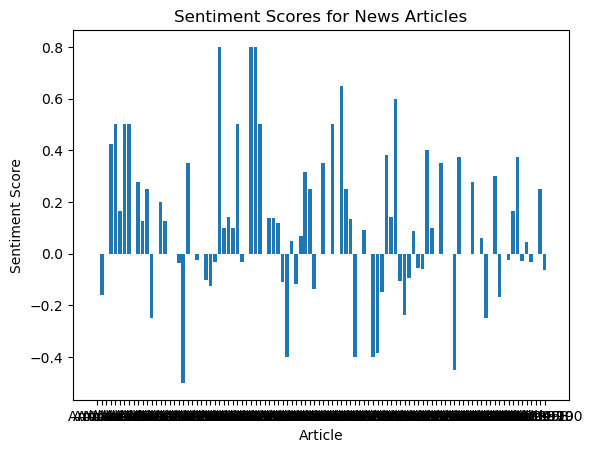

In [8]:
import matplotlib.pyplot as plt

# Create a list of labels for the articles
article_labels = [f"Article {i+1}" for i in range(len(sentiment_scores))]

# Create a bar chart of the sentiment scores
plt.bar(article_labels, sentiment_scores)

# Add a title and axis labels
plt.title("Sentiment Scores for News Articles")
plt.xlabel("Article")
plt.ylabel("Sentiment Score")

# Display the chart
plt.show()


In [10]:
pip install wordcloud


     -------------------------------------- 153.3/153.3 kB 2.3 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


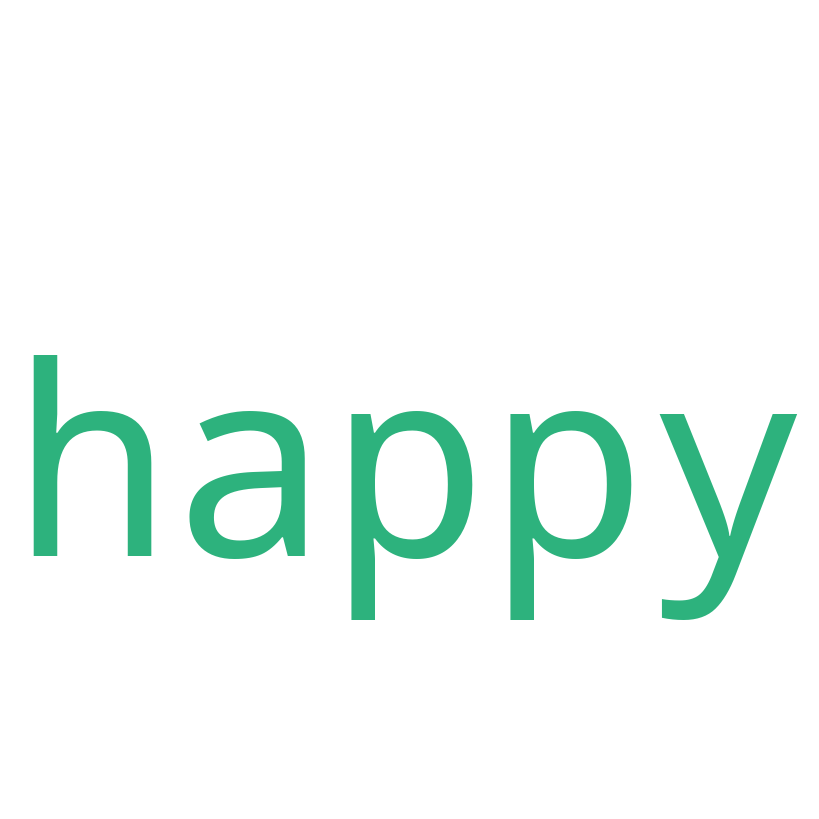

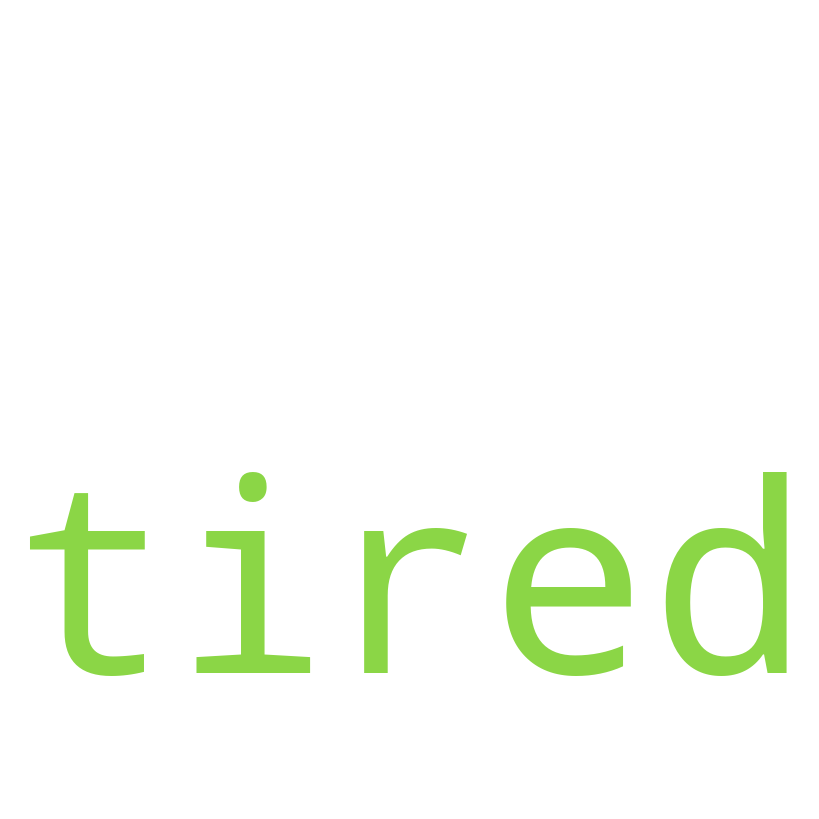

In [11]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Preprocessed text data
text = "preprocessed text"

# List of (word, sentiment score) tuples
word_sentiments = [('happy', 0.5), ('sad', -0.2), ('excited', 0.8), ('tired', -0.4), ('calm', 0.1)]

# Define a dictionary of word frequencies based on sentiment scores
sentiment_word_freq = {}
for word, sentiment in word_sentiments:
    if sentiment not in sentiment_word_freq:
        sentiment_word_freq[sentiment] = {}
    if word not in sentiment_word_freq[sentiment]:
        sentiment_word_freq[sentiment][word] = 1
    else:
        sentiment_word_freq[sentiment][word] += 1

# Define a function to generate a word cloud based on a given sentiment score
def generate_wordcloud(sentiment):
    words = sentiment_word_freq[sentiment]
    wordcloud = WordCloud(width=800, height=800, background_color='white').generate_from_frequencies(words)
    plt.figure(figsize=(8, 8), facecolor=None)
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.tight_layout(pad=0)
    plt.show()

# Generate a word cloud for positive sentiment words
generate_wordcloud(0.5)

# Generate a word cloud for negative sentiment words
generate_wordcloud(-0.4)


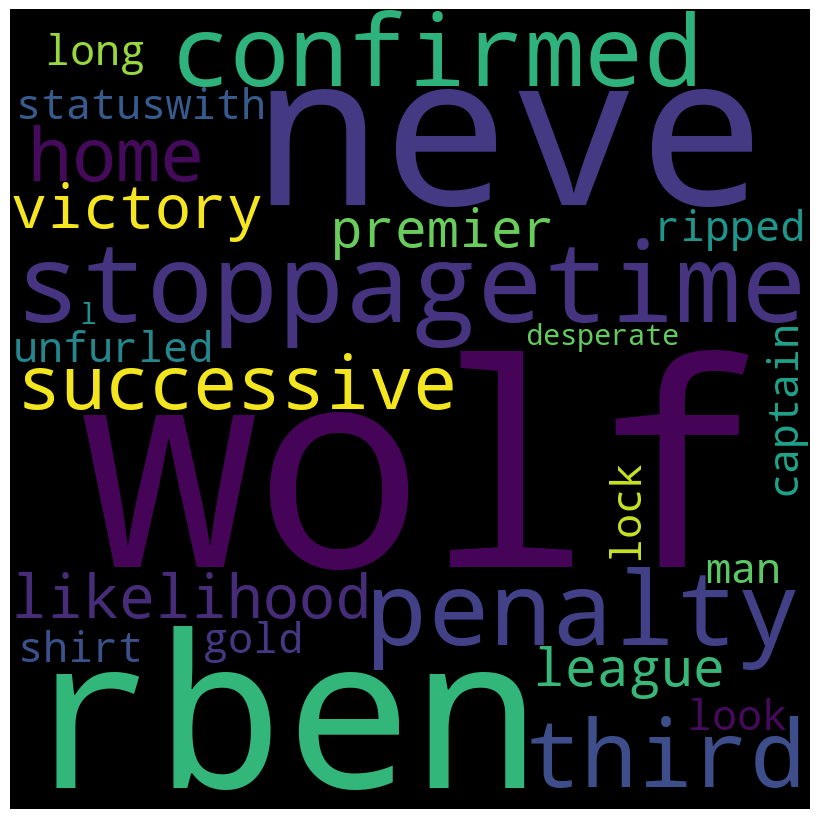

In [13]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Define the text
text = "rben neve stoppagetime penalty confirmed wolf third successive home victory likelihood premier league statuswith long lock unfurled gold shirt ripped wolf captain look like man desperate l"

# Generate the word cloud
wordcloud = WordCloud(width=800, height=800, background_color='black').generate(text)

# Display the word cloud
plt.figure(figsize=(8,8), facecolor=None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)

# Save the word cloud as an image file
wordcloud.to_file("wordcloud.png")
